# 1. import libraries

- np, pd, sns, plt
- sklearn.dataset -> fetch_20newsgroups
- sklearn.feature_extraction.test -> TfidVectorizer
- sklearn.naive_bayes -> multinomialNB
- sklearn.pipeline -> make_pipeline
- sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# 2. Get data

1. Get data = fetch_20newsgroups class
2. init data object and get target_names attribute
3. get training data (fetch)
4. get testing data

In [37]:
data = fetch_20newsgroups
text_categories = data().target_names
train_data = data(subset = "train", categories = text_categories)
test_data = data(subset = "test", categories = text_categories)

# 3. Make and predict model

- make pipeline for model using TfidVectorizer, Multinomial
- fit model with train_data
- predict categories using test_data

In [38]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)

predicted_categories = model.predict(test_data.data)

4. Visualize results

- get confusion_matrix for test_data.target & predicted_categories
- plot sns heatmap with inverted matrix
    - set xticklabels & yticklabels as train_data.target_names

<AxesSubplot:>

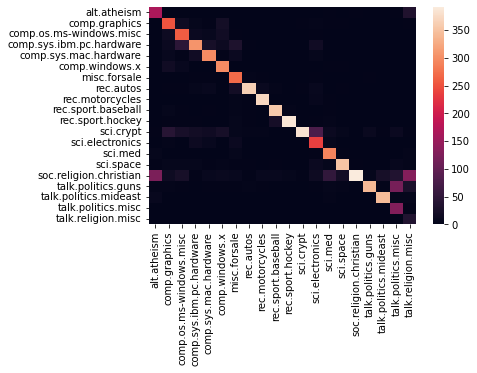

In [39]:
mat = confusion_matrix(test_data.target, predicted_categories)

sns.heatmap(mat.T,
    xticklabels = train_data.target_names,
    yticklabels = train_data.target_names)

# 4. Prediction

- use model.predict(["sentence"]) to get array index of np.arrya(data().target_names)
- Write a function for the same ^
- Test a few sentences

In [62]:
def my_prediction(my_sentence, model):
    all_categories_names = np.array(data().target_names)
    prediction = model.predict([my_sentence])

    return all_categories_names[prediction]

my_sentence = "jesus"
print(my_prediction(my_sentence, model))

my_sentence = "Are you an atheist"
print(my_prediction(my_sentence, model))

['soc.religion.christian']
['alt.atheism']
